In [81]:
import numpy as np
import pandas as pd
import dataframe_image as dfi
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import requests
torch.manual_seed(1)

# Examine the Data

In [82]:
df = pd.read_csv('data/AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-10-10,0.213170,0.218750,0.212054,0.215960,0.183808,276696000
1,1996-10-11,0.217634,0.219866,0.214286,0.216518,0.184282,120691200
2,1996-10-14,0.218750,0.226563,0.216518,0.225446,0.191881,269684800
3,1996-10-15,0.229911,0.231027,0.223214,0.225446,0.191881,363059200
4,1996-10-16,0.225446,0.233259,0.219866,0.229911,0.195681,334745600
...,...,...,...,...,...,...,...
6666,2023-04-06,162.429993,164.960007,162.000000,164.660004,164.660004,45390100
6667,2023-04-10,161.419998,162.029999,160.080002,162.029999,162.029999,47716900
6668,2023-04-11,162.350006,162.360001,160.509995,160.800003,160.800003,47644200
6669,2023-04-12,161.220001,162.059998,159.779999,160.100006,160.100006,50133100


In [83]:
stats = df.describe()
stats = stats.drop(['count'])
skewness = df.skew(numeric_only = True)
stats.loc['skewness'] = skewness
kurtosis = df.kurtosis(numeric_only = True)
stats.loc['kurtosis'] = kurtosis
stats

,Open,High,Low,Close,Adj Close,Volume
mean,27.574337,27.889332,27.268199,27.591847,26.518999,4.104027e+08
std,43.194357,43.725962,42.693246,43.234617,43.003302,3.867462e+08
min,0.114955,0.118304,0.113839,0.115513,0.098315,3.519590e+07
25%,0.546875,0.557132,0.540536,0.549286,0.467507,1.426825e+08
50%,7.273929,7.339286,7.182500,7.264286,6.182768,2.958368e+08
75%,30.966249,31.222500,30.636251,30.871249,28.080184,5.407542e+08
max,182.630005,182.940002,179.119995,182.009995,180.683853,7.421641e+09
skewness,2.038258,2.040130,2.036587,2.038582,2.084133,3.077137e+00
kurtosis,3.128614,3.132223,3.126238,3.130121,3.275641,2.422910e+01


In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (12, 8))
plt.plot(df[['Close']])
plt.xticks(range(0, df.shape[0], 600), df['Date'].loc[::600], rotation=45, fontsize=16)
plt.title("Apple Stock Price", fontsize=22, fontweight='bold')
plt.xlabel('Date', fontsize=22)
plt.ylabel('Close Price (USD)', fontsize=22)
plt.show()

## Training the model
In **train.py** we define several functions for data loading, preprocessing and splitting into train and test sets.\
In **LSTM.py** we construct LSTM class for price prediction, which we also use for training and for inference engine

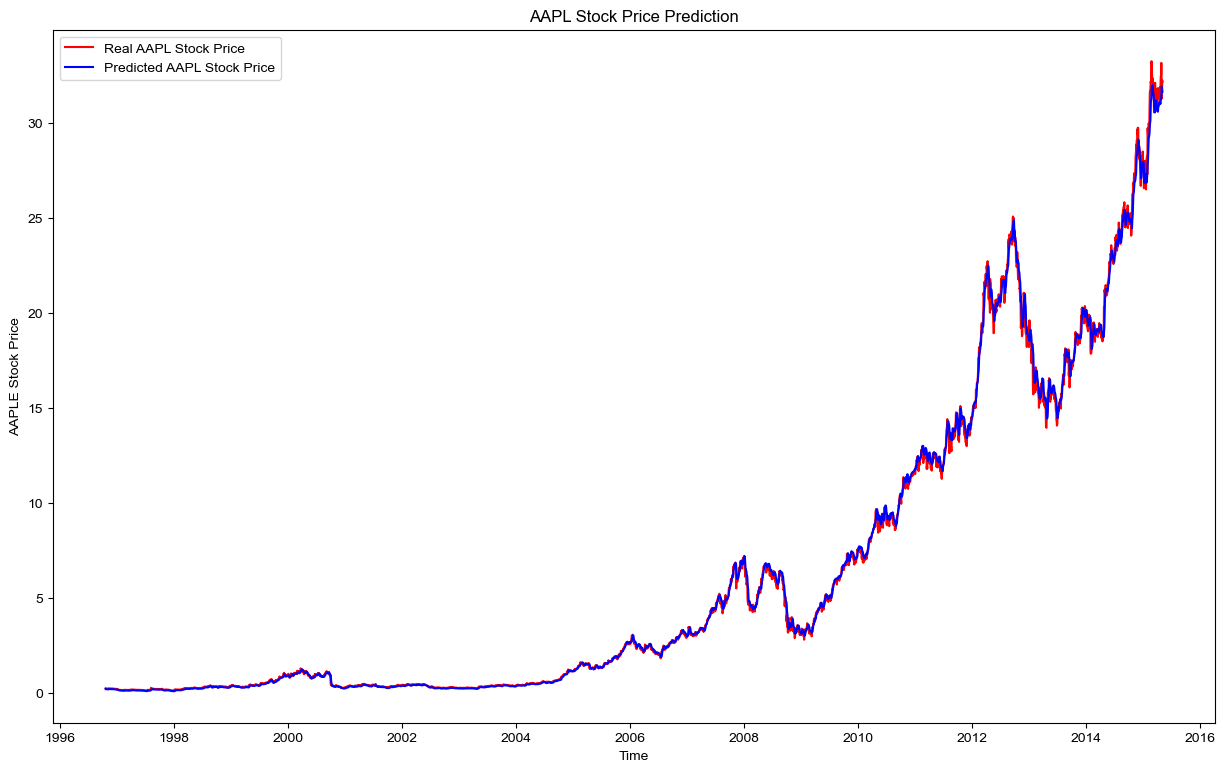

In [289]:
with open('c:/Users/user/Desktop/python_project/training/train_pred.pkl','rb') as fig:
    fig = pickle.load(fig)
plt.show()

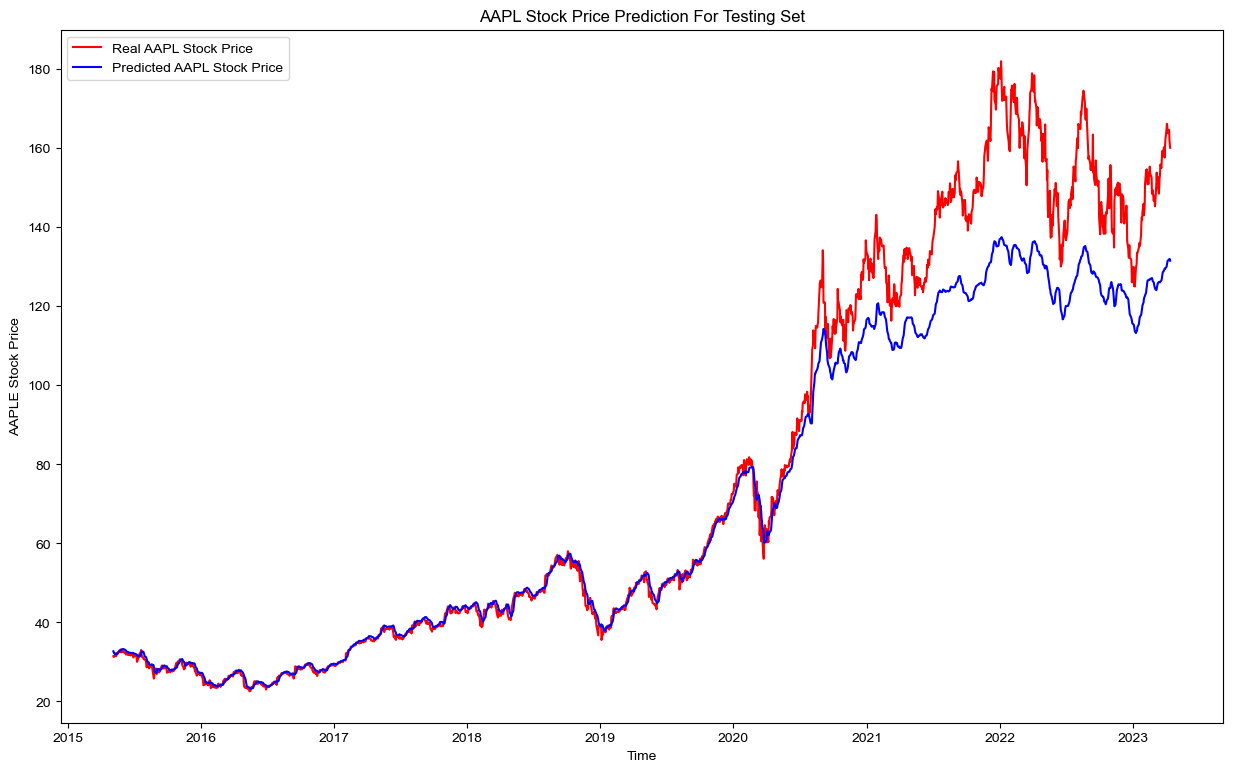

In [312]:
with open('c:/Users/user/Desktop/python_project/training/test_pred.pkl','rb') as fig:
    fig = pickle.load(fig)
plt.show()

## Inference engine
In **inference_engine.py** we combine the preprocessing, predicting and postprocessing functions for easier use.

## Tests


In [335]:
# !pytest --verbose
!pytest tests/test_training.py --verbose

============================= test session starts =============================
platform win32 -- Python 3.11.7, pytest-7.4.0, pluggy-1.0.0 -- C:\Users\user\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\user\Desktop\python_project
plugins: anyio-4.2.0, dash-2.16.1, cov-5.0.0
collecting ... collected 3 items

tests/test_training.py::test_load_data PASSED                            [ 33%]
tests/test_training.py::test_data_processing PASSED                      [ 66%]
tests/test_training.py::test_split_data PASSED                           [100%]

============================== 3 passed in 5.30s ==============================


In [336]:
!pytest --cov 

============================= test session starts =============================
platform win32 -- Python 3.11.7, pytest-7.4.0, pluggy-1.0.0
rootdir: C:\Users\user\Desktop\python_project
plugins: anyio-4.2.0, dash-2.16.1, cov-5.0.0
collected 7 items

tests\test_inference.py ...                                              [ 42%]
tests\test_performance.py .                                              [ 57%]
tests\test_training.py ...                                               [100%]

---------- coverage: platform win32, python 3.11.7-final-0 -----------
Name                         Stmts   Miss  Cover
------------------------------------------------
models\__init__.py               0      0   100%
models\inference_engine.py      32      0   100%
models\lstm_model.py            19      8    58%
tests\test_inference.py         31      0   100%
tests\test_performance.py       36      8    78%
tests\test_training.py          34      0   100%
training\__init__.py             0      0   10

## Example usage of API
Run **main.py** in terminal and go to http://127.0.0.1:8000/docs for documentation

In [313]:

data = {
    "data": df['Open'].values.tolist()
}
response = requests.post("http://127.0.0.1:8000/predict", 
                         json=data
                              )
if response.status_code == 200:
    # Print the JSON content of the response
    predictions = response.json()
    print(predictions)
else:
    print(f"Request failed with status code {response.status_code} \n Detail: {response.json()}")                   

{'predictions': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [314]:
# df['Date'] = pd.to_datetime(df['Date'], freq='D')
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df.asfreq('d').index


In [315]:
df.index[1:]

DatetimeIndex(['1996-10-11', '1996-10-14', '1996-10-15', '1996-10-16',
               '1996-10-17', '1996-10-18', '1996-10-21', '1996-10-22',
               '1996-10-23', '1996-10-24',
               ...
               '2023-03-30', '2023-03-31', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-10', '2023-04-11',
               '2023-04-12', '2023-04-13'],
              dtype='datetime64[ns]', name='Date', length=6670, freq=None)

In [316]:
dates = df.index[6:] #we use 29 because we use first 30 values for predictions
raw_data_adjusted = df['Open'].values[6:]


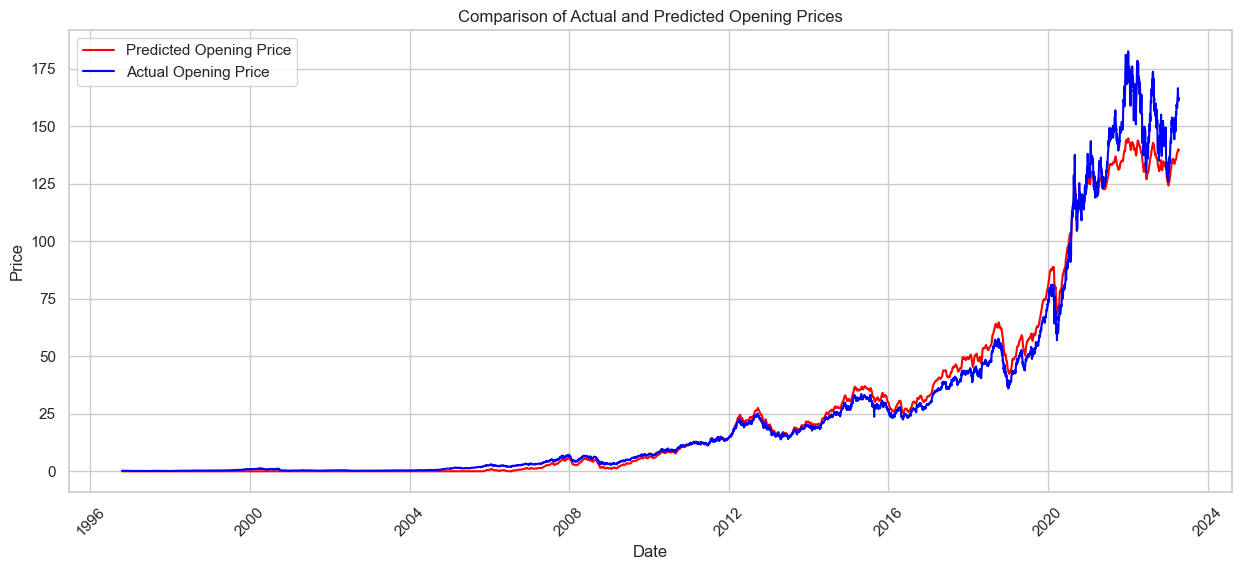

In [317]:
plt.figure(figsize=(15, 6)) 
plt.plot(dates, predictions['predictions'], color='red', label='Predicted Opening Price')
plt.plot(dates, raw_data_adjusted, color='blue', label='Actual Opening Price')
plt.legend()
plt.title('Comparison of Actual and Predicted Opening Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()